# 5, Unsupervised Learning - K-means


Experiment on K=10, P=20

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import loadmat
import math
import random

In [ ]:
X = loadmat("mnist.mat")
print(X)

data_train = X['trainX'] # Training set digits 

print(data_train.shape)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
(60000, 784)


In [ ]:
def initiation(K,data):
 
    n = int(len(data)/K)
    
    cluster_num = np.repeat(np.arange(K),n)
    np.random.shuffle(cluster_num)
    return cluster_num

In [ ]:
def get_label(cluster_num,K,data):
    label = np.zeros((K,len(data[0])))
    for i in range(K):
        cluster = data[np.where(cluster_num==i)]
        label[i,:] = np.mean(cluster,axis = 0)
    return label # return a list of label

In [ ]:
def new_cluster(K,label,data):
    # new_cluster_num = old_cluster
    data_norms = np.zeros((len(data),K)) 
    
    for i in range(K):
        dists = np.linalg.norm(data-label[i], axis = 1)
        data_norms[:,i] = dists
        
    new_cluster_num = np.argmin(data_norms, axis = 1)
    
    '''for i in range(len(data)):
        min_dist = 10000
        for j in range(K):
            if np.linalg.norm(data[i]-label[j])<min_dist:
                min_dist = np.linalg.norm(data[i]-label[j])
                new_cluster_num[i] = j'''
    return new_cluster_num

In [ ]:
def k_mean(K,data):
    cluster_num = initiation(K,data)
    label = get_label(cluster_num,K,data)
    count = 0
    J_clust = []
    while count<25:
        cluster_num = new_cluster(K,label,data)
        label = get_label(cluster_num,K,data)
        count += 1
        
        print('%d th iteration' % count) 
        
        means = np.linalg.norm(data-label[cluster_num])
        J = np.sum(means)
        
        '''for i in range(len(data)):
            class_num = int(cluster_num[i])
            J += (np.linalg.norm(data[i]-label[class_num]))**2'''
        J = J/len(data)
        J_clust.append(J)
    return cluster_num, label, J_clust

In [ ]:
def k_mean_Pruns(K,data,P):
    J_clust_all = np.zeros((P,25))
    label_all = np.zeros((P,K,len(data[0])))
    cluster_all = np.zeros((P,len(data)))
    for i in range(P):
        cluster_num, label, J_clust = k_mean(K,data)
        J_clust_all[i,:] = J_clust
        label_all[i,:,:] = label
        cluster_all[i,:] = cluster_num
    min_J_i = np.argmin(J_clust_all[:,-1])
    max_J_i = np.argmax(J_clust_all[:,-1])
    min_J = J_clust_all[min_J_i]
    max_J = J_clust_all[max_J_i]
    min_label = label_all[min_J_i]
    max_label = label_all[max_J_i]
    min_cluster = cluster_all[min_J_i]
    max_cluster = cluster_all[max_J_i]
    return min_J, min_label, min_cluster, max_J, max_label, max_cluster

In [ ]:
min_J, min_label, min_cluster, max_J, max_label, max_cluster = k_mean_Pruns(5,data_train,10)

## 5.1 Plotting J_clust

Text(0, 0.5, 'J_clust')

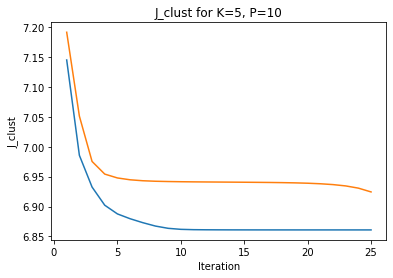

In [ ]:
x = np.arange(25)+1
plt.plot(x, min_J)
plt.plot(x, max_J)
plt.title('J_clust for K=5, P=10')
plt.xlabel('Iteration')
plt.ylabel('J_clust')

The minimum(blue) and maximum(orange) J_clust shows similar curve, but the curve for minimum J_clust is smoothier. They both drop very quickly before the first 5 iteration and flatten out at about 10 iterations. This suggests that the clustering is successful. The minimum J_clust flattens out at a smaller value than the maximum J_clust. The curve shape is very similar to that of K=20 P=30 and K=10 P=20, but has a larger J_clust value after the last iteration. Also, the gap between minimum J_clust and Maximum J_clust is larger than previous two experiments. This make sense since more classes and more repeated times are supposed to generate more accurate classification, which is showed in smaller J_clust.

## 5.2 Visualization of representitives

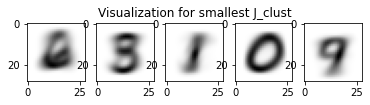

In [ ]:
plt.subplot(1, 5, 1)
plt.imshow(min_label[0,:].reshape(28,28),cmap='binary')
plt.subplot(1, 5, 2)
plt.imshow(min_label[1,:].reshape(28,28),cmap='binary')
plt.subplot(1, 5, 3)
plt.imshow(min_label[2,:].reshape(28,28),cmap='binary')
plt.title('Visualization for smallest J_clust')
plt.subplot(1, 5, 4)
plt.imshow(min_label[3,:].reshape(28,28),cmap='binary')
plt.subplot(1, 5, 5)
plt.imshow(min_label[4,:].reshape(28,28),cmap='binary')

The representitives should be digits that represent all digits in that class. For minimum J_clust, they represents digits 6,3/5,1,0,9/7.

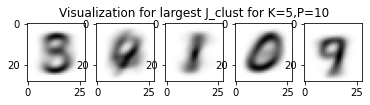

In [ ]:
plt.subplot(1, 5, 1)
plt.imshow(max_label[0,:].reshape(28,28),cmap='binary')
plt.subplot(1, 5, 2)
plt.imshow(max_label[1,:].reshape(28,28),cmap='binary')
plt.subplot(1, 5, 3)
plt.imshow(max_label[2,:].reshape(28,28),cmap='binary')
plt.title('Visualization for largest J_clust for K=5,P=10')
plt.subplot(1, 5, 4)
plt.imshow(max_label[3,:].reshape(28,28),cmap='binary')
plt.subplot(1, 5, 5)
plt.imshow(max_label[4,:].reshape(28,28),cmap='binary')

For minimum J_clust, they represents digits 3,4/9,1,0,7/9. Representitives for minimum J_clust shows clearer identification of digits than Representitives for maximum J_clust. Some of the representitives in maximum J_clust shows very blury image which are hard to identified which digit it represents. Also, representitives for maximum J_clust of some classes represents two digits, for example class 1 represents 4 and 9, and there're two represents 9 but none representes 5. Although the same trend also happens in representitives in minimum J_clust, but they are generally clearer and easier to identify.

Comparing to K=20 P=30 and K=10 P=20, each representitives shows blurier images and is harder to identify as digit. Also, more repetition and missing of digits occurs than previous two experiments. 

In [ ]:
def find_10smallest(data,cluster,label,num):
    data_atnum = data[np.where(cluster == num)]
    dists = np.linalg.norm(data_atnum-label[num], axis = 1)
    smallest_i = np.argpartition(dists,10)[:10]
    smallest_data = data_atnum[smallest_i]
    return smallest_data

In [ ]:
def draw_10smallest(data,cluster,label,num):
    smallest10_data = find_10smallest(data,cluster,label,num)
    fig, axs = plt.subplots(2, 5)
    (ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
    fig.suptitle('Visualization for smallest 10 for class %d' % num)
    ax1.imshow(smallest10_data[0,:].reshape(28,28),cmap='binary')
    ax2.imshow(smallest10_data[1,:].reshape(28,28),cmap='binary')
    ax3.imshow(smallest10_data[2,:].reshape(28,28),cmap='binary')
    ax4.imshow(smallest10_data[3,:].reshape(28,28),cmap='binary')
    ax5.imshow(smallest10_data[4,:].reshape(28,28),cmap='binary')
    ax6.imshow(smallest10_data[5,:].reshape(28,28),cmap='binary')
    ax7.imshow(smallest10_data[6,:].reshape(28,28),cmap='binary')
    ax8.imshow(smallest10_data[7,:].reshape(28,28),cmap='binary')
    ax9.imshow(smallest10_data[8,:].reshape(28,28),cmap='binary')
    ax10.imshow(smallest10_data[9,:].reshape(28,28),cmap='binary')

    for ax in axs.flat:
        ax.label_outer()

## 5.3 Identification of Classified/Misclassified

### 5.3.1 Identification for minimum J_clust

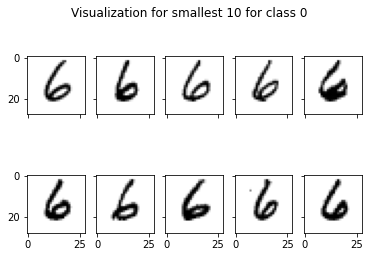

In [ ]:
draw_10smallest(data_train, min_cluster, min_label, 0)

We can see that class 0 represents number 6.   
Digits: 6,6,6,6,6,6,6,6,6,6  
Number of classified: 10  
Number of misclassified: 0  

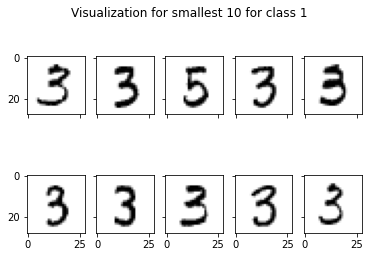

In [ ]:
draw_10smallest(data_train, min_cluster, min_label, 1)

We can see that class 1 represents number 3 and 5   
Digits: 3,3,5,3,3,3,3,3,3,3  
Number of classified: 10  
Number of misclassified: 0  

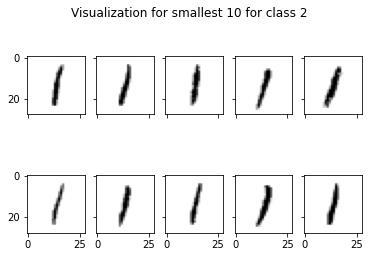

In [ ]:
draw_10smallest(data_train, min_cluster, min_label, 2)

We can see that class 2 represents number 1.   
Digits: 1,1,1,1,1,1,1,1,1,1  
Number of classified: 10  
Number of misclassified: 0 

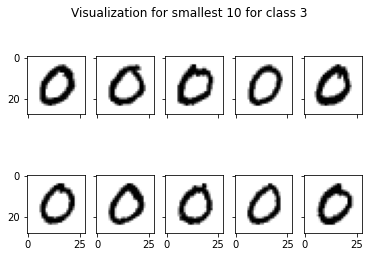

In [ ]:
draw_10smallest(data_train, min_cluster, min_label, 3)

We can see that class 3 represents number 0.   
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0 

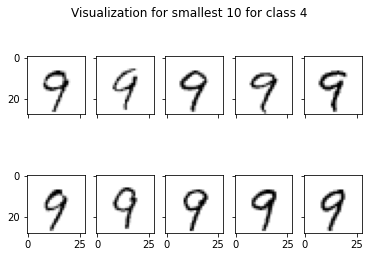

In [ ]:
draw_10smallest(data_train, min_cluster, min_label, 4)

We can see that class 4 represents number 9 and 7.   
Digits: 9,9,9,9,9,9,9,9,9,9  
Number of classified: 10  
Number of misclassified: 0 

### 5.3.2 Identification for maximum J_clust

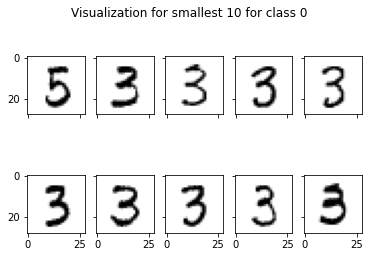

In [ ]:
draw_10smallest(data_train, max_cluster, max_label, 0)

We can see that class 0 represents number 3 and 5   
Digits: 5,3,3,3,3,3,3,3,3,3  
Number of classified: 10  
Number of misclassified: 0 

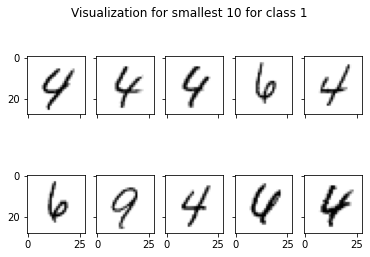

In [ ]:
draw_10smallest(data_train, max_cluster, max_label, 1)

We can see that class 1 represents number 4 and 6   
Digits: 4,4,4,6,4,6,9,4,4,4  
Number of classified: 9  
Number of misclassified: 1

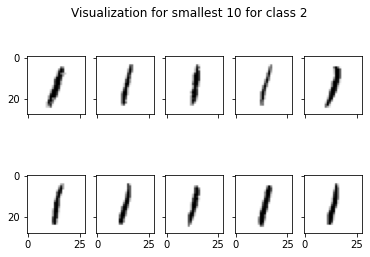

In [ ]:
draw_10smallest(data_train, max_cluster, max_label, 2)

We can see that class 2 represents number 1.   
Digits: 1,1,1,1,1,1,1,1,1,1  
Number of classified: 10  
Number of misclassified: 0

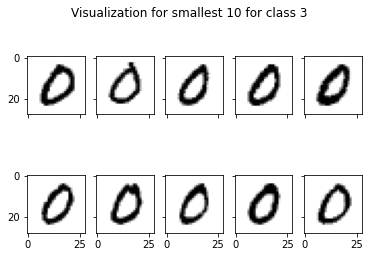

In [ ]:
draw_10smallest(data_train, max_cluster, max_label, 3)

We can see that class 3 represents number 0.  
Digits: 0,0,0,0,0,0,0,0,0,0  
Number of classified: 10  
Number of misclassified: 0

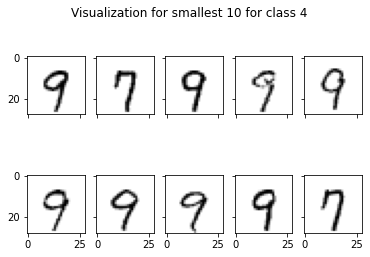

In [ ]:
draw_10smallest(data_train, max_cluster, max_label, 4)

We can see that class 4 represents number 9 and 7   
Digits: 9,7,9,9,9,9,9,9,9,7  
Number of classified: 10  
Number of misclassified: 0

### 5.3.3 Tables of classified/misclassified

Following is the table for minimum J_clust.

In [ ]:
min_identify = {'Classified': [10,10,10,10,10],
        'Misclassified': [0,0,0,0,0] }
table_min = pd.DataFrame(min_identify, columns = ['Classified', 'Misclassified'])
table_min

,Classified,Misclassified
0,10,0
1,10,0
2,10,0
3,10,0
4,10,0


Following is the table for maximum J_clust.

In [ ]:
max_identify = {'Classified': [10,9,10,10,10],
        'Misclassified': [0,1,0,0,0] }
table_max = pd.DataFrame(max_identify, columns = ['Classified', 'Misclassified'])
table_max

,Classified,Misclassified
0,10,0
1,9,1
2,10,0
3,10,0
4,10,0


Observation shows that maximum J_clust has a greater number of misclassified than minimum J_clust. As J_clust represents distance from each data to the representitives, smaller J_clust means better classification of each digit, which is consistent with the observation.

### 4.3.4 Example visualization of misclassifed and classified in some class

#### Minimum J_clust

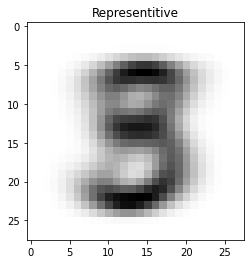

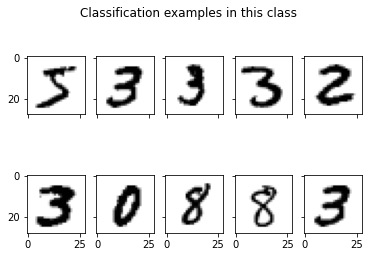

In [ ]:
plt.subplot()
plt.imshow(min_label[1,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(min_cluster == 1)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()

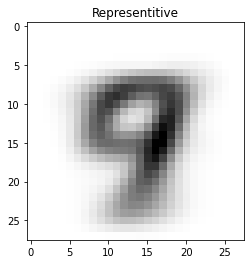

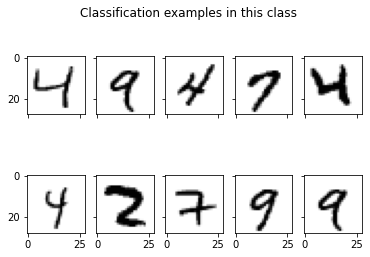

In [ ]:
plt.subplot()
plt.imshow(min_label[4,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(min_cluster == 4)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()

#### Maximum J_clust

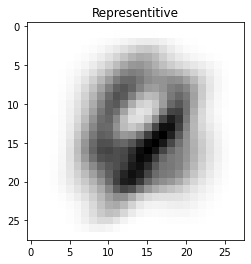

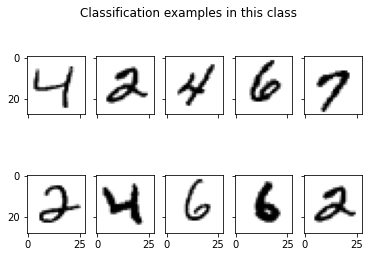

In [ ]:
plt.subplot()
plt.imshow(max_label[1,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(max_cluster == 1)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()

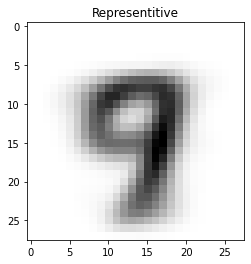

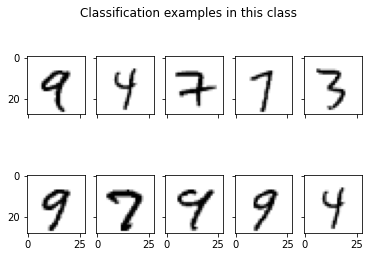

In [ ]:
plt.subplot()
plt.imshow(max_label[4,:].reshape(28,28),cmap='binary')
plt.title('Representitive')

data_atnum = data_train[np.where(max_cluster == 4)]

fig, axs = plt.subplots(2, 5)
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs
fig.suptitle('Classification examples in this class')
ax1.imshow(data_atnum[0,:].reshape(28,28),cmap='binary')
ax2.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')
ax3.imshow(data_atnum[2,:].reshape(28,28),cmap='binary')
ax4.imshow(data_atnum[3,:].reshape(28,28),cmap='binary')
ax5.imshow(data_atnum[4,:].reshape(28,28),cmap='binary')
ax6.imshow(data_atnum[5,:].reshape(28,28),cmap='binary')
ax7.imshow(data_atnum[6,:].reshape(28,28),cmap='binary')
ax8.imshow(data_atnum[7,:].reshape(28,28),cmap='binary')
ax9.imshow(data_atnum[8,:].reshape(28,28),cmap='binary')
ax10.imshow(data_atnum[1,:].reshape(28,28),cmap='binary')

for ax in axs.flat:
    ax.label_outer()

Generally, K=10 P=20 shows less accurate classification than K=20 P=30 and K=10 P=20. So classification into more classes and larger repetition times generate more accurate clustering.

# 6, Comparison between supervised and unsupervised learning

Least square classifier gives more accurate results than k-means clustering. As we can see from examples visualization at the end of each session, a significant amount of the digits are misclassified in k-means clustering. Even the 10 nearest digits shows some misclassifications, while both the least square classifiers have an decent error rate below 15%.

However, when unsupervised learning gives less accurate results, it's useful when no labels is known. It can find the hidden patterns for some unknown dataset and is more close to the true Artificial Intelligence. 